In [11]:
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt


In [6]:
class PositionalEncoding(nn.Module):
    "Implement the PE function."
    def __init__(self, d_model, dropout, max_len=5000):
        # d_model=512,dropout=0.1,
        # max_len=5000代表事先准备好长度为5000的序列的位置编码，其实没必要，
        # 一般100或者200足够了。
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model)
        # (5000,512)矩阵，保持每个位置的位置编码，一共5000个位置，
        # 每个位置用一个512维度向量来表示其位置编码
        position = torch.arange(0, max_len).unsqueeze(1)
        # (5000) -> (5000,1)
        div_term = torch.exp(torch.arange(0, d_model, 2) *
                             -(math.log(10000.0) / d_model))
        # (0,2,…, 4998)一共准备2500个值，供sin, cos调用
        pe[:, 0::2] = torch.sin(position * div_term)  # 偶数下标的位置
        pe[:, 1::2] = torch.cos(position * div_term)  # 奇数下标的位置
        pe = pe.unsqueeze(0)
        # (5000, 512) -> (1, 5000, 512) 为batch.size留出位置
        self.register_buffer('pe', pe)

    # 注意，位置编码不会更新，是写死的，所以这个class里面没有可训练的参数。
    def forward(self, x):
        x = x + Variable(self.pe[:, :x.size(1)], requires_grad=False)
        # 接受1.Embeddings的词嵌入结果x，
        # 然后把自己的位置编码pe，封装成torch的Variable(不需要梯度)，加上去。
        # 例如，假设x是(30,10,512)的一个tensor，
        # 30是batch.size, 10是该batch的序列长度, 512是每个词的词嵌入向量；
        # 则该行代码的第二项是(1, min(10, 5000), 512)=(1,10,512)，
        # 在具体相加的时候，会扩展(1,10,512)为(30,10,512)，
        # 保证一个batch中的30个序列，都使用（叠加）一样的位置编码。
        return self.dropout(x)  # 增加一次dropout操作

In [27]:
pe=PositionalEncoding(d_model=512,dropout=0.0,max_len=512)

In [8]:
pe

PositionalEncoding(
  (dropout): Dropout(p=0.0, inplace=False)
)

In [10]:
pe.register_buffer

<bound method Module.register_buffer of PositionalEncoding(
  (dropout): Dropout(p=0.0, inplace=False)
)>

In [30]:
figue=plt.figure()

<Figure size 432x288 with 0 Axes>

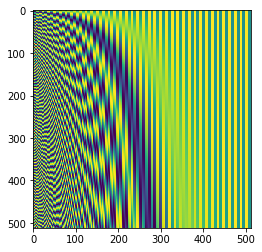

In [28]:
plt.imshow(pe.pe.reshape(pe.pe.shape[1],pe.pe.shape[2]))

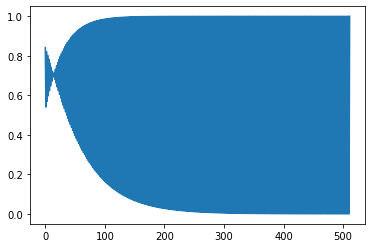

In [21]:
plt.plot(range(0,512),pe.pe[0,1,:])

In [26]:
pe.pe[0,1,:].shape

torch.Size([512])

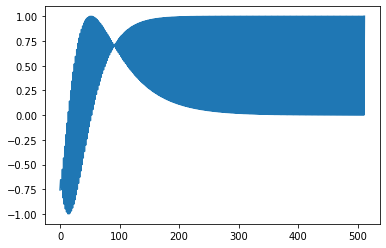

In [34]:
plt.plot(pe.pe[0,4,:])